# Example of the aitlas toolbox in the context of image segmentation

This notebook shows a sample implementation of a image segmentation using the aitlas toolbox.

## Import the required packages

In [ ]:
from aitlas.datasets import DeepGlobeDataset
from aitlas.utils import image_loader
from aitlas.transforms import MinMaxNormTranspose
from aitlas.transforms import ResizeToTensor
from aitlas.models import DeepLabV3

## Visualize images and masks

Total number of patches: 683


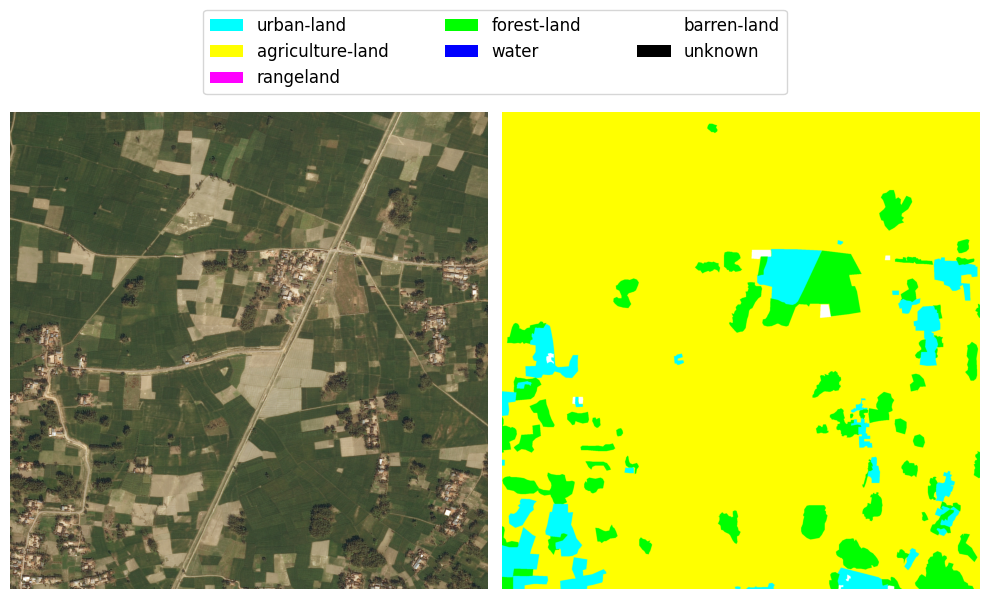

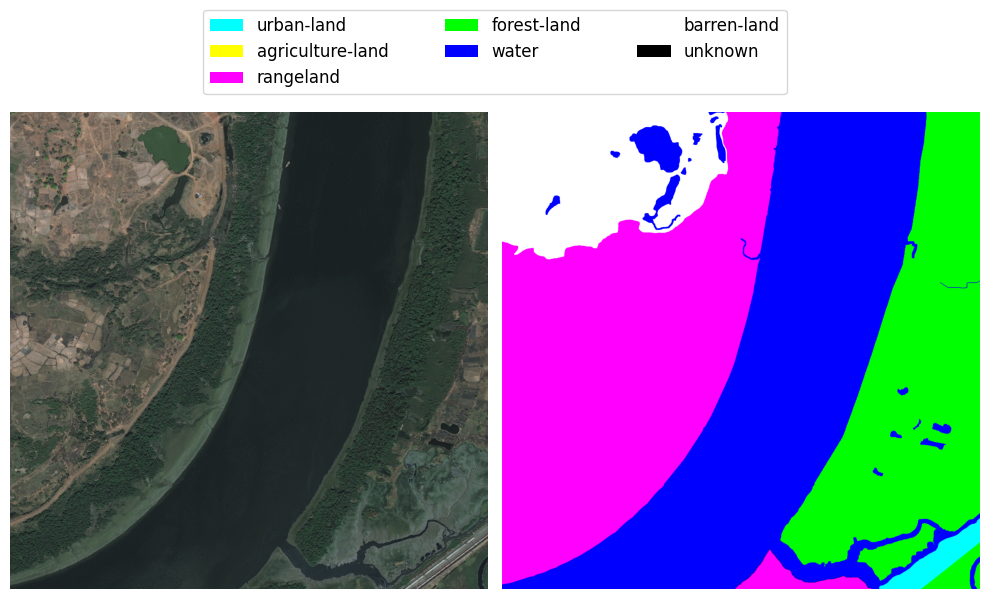

In [3]:
dataset_config = {
    "data_dir": "/home/dragik/data/semseg/DeepGlobe/data/training_data"
}
dataset = DeepGlobeDataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(11);
dataset.show_image(6);

In [4]:
dataset.data_distribution_table()

,Number of pixels
urban-land,4.249859e+08
agriculture-land,2.251291e+09
rangeland,4.072125e+08
forest-land,3.284908e+08
water,1.262077e+08
barren-land,2.948008e+08
unknown,2.342141e+06


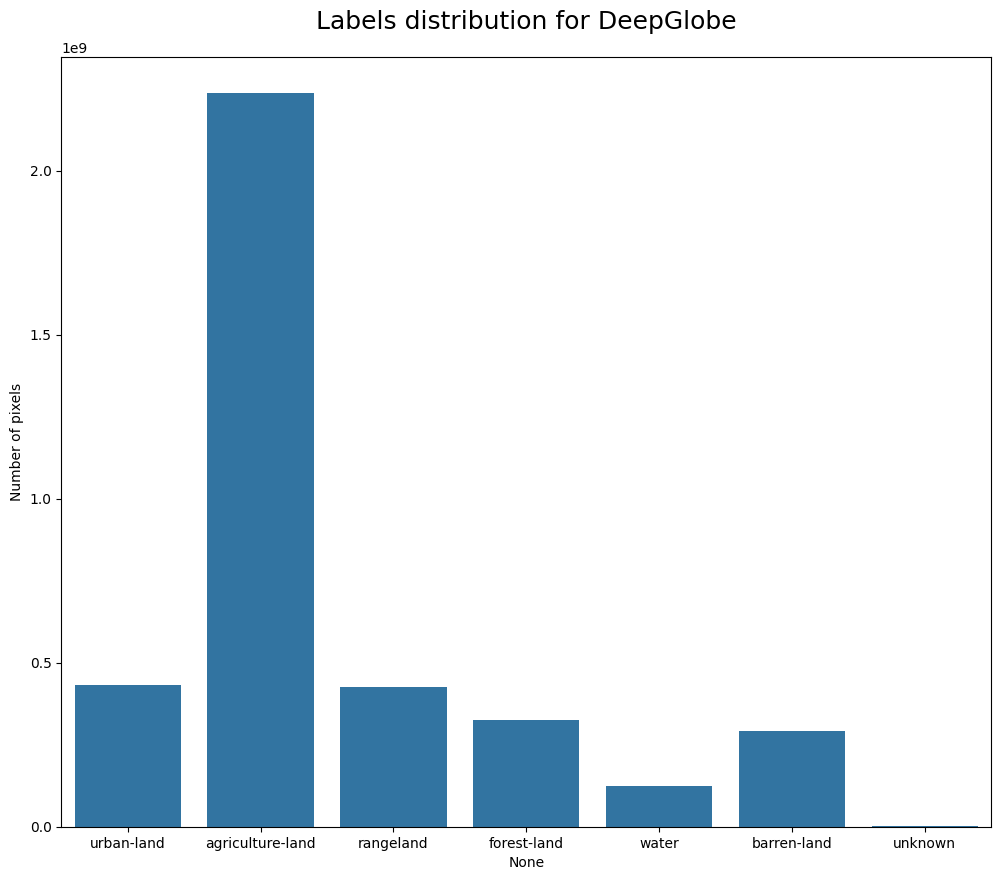

In [5]:
dataset.data_distribution_barchart();

## Load training data ##

In [3]:
train_dataset_config = {
    "batch_size": 4,
    "shuffle": True,
    "num_workers": 4,
    "data_dir": "/home/dragik/data/semseg/DeepGlobe/data/training_data",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose","aitlas.transforms.ResizeToTensor"],
    "target_transforms": ["aitlas.transforms.Transpose","aitlas.transforms.ResizePerChannelToTensor"]
}
train_dataset = DeepGlobeDataset(train_dataset_config)
len(train_dataset)

683

## Create the model ##

In [4]:
epochs = 1
model_directory = "/home/dragik/data/semseg/DeepGlobe/experiments"
model_config = {
    "num_classes": 7, 
    "learning_rate": 0.0001,
    "pretrained": True, 
    "threshold": 0.5,
    "metrics": ["iou"]
}
model = DeepLabV3(model_config)
model.prepare()

## Start the training ##

In [5]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

Starting training.


training:  58%|███████████████████████████████████████▎                            | 99/171 [3:00:30<1:53:35, 94.66s/it]

[1, 100], loss:  0.69159


training: 100%|████████████████████████████████████████████████████████████████████| 171/171 [5:10:18<00:00, 108.88s/it]

epoch: 1, time: 18619, loss:  0.65820



testing on train set: 100%|████████████████████████████████████████████████████████| 171/171 [5:10:53<00:00, 109.08s/it]

IOU:0.5885360772379467, IOU mean:0.37636734186198667, IOU per Class:[0.44759941 0.79008908 0.50075154 0.08282344 0.37943859 0.43386932
 0.        ]


Train loss: [0.4962496240875557]
Validation loss: []
Train time per epochs: [18619]
Finished training. training time: 18619


## Evaluate the model ##

In [6]:
test_dataset_config = {
    "batch_size": 4,
    "shuffle": False,
    "num_workers": 4,
    "data_dir": "/home/dragik/data/semseg/DeepGlobe/data/test_data",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose","aitlas.transforms.ResizeToTensor"],
    "target_transforms": ["aitlas.transforms.Transpose","aitlas.transforms.ResizePerChannelToTensor"]
}

test_dataset = DeepGlobeDataset(test_dataset_config)
len(test_dataset)

model = DeepLabV3(model_config)
model.prepare()
model.running_metrics.reset()
model_path = "/home/dragik/data/semseg/DeepGlobe/experiments/checkpoint.pth.tar"
model.evaluate(dataset=test_dataset, model_path=model_path)
model.running_metrics.get_scores(model.metrics)

Loading checkpoint /home/dragik/data/semseg/DeepGlobe/experiments/checkpoint.pth.tar
Loaded checkpoint /home/dragik/data/semseg/DeepGlobe/experiments/checkpoint.pth.tar at epoch 2


testing on test set: 100%|█████████████████████████████████████████████████████████████| 30/30 [57:49<00:00, 115.64s/it]


[{'IOU': 0.5444942400267231,
  'IOU mean': 0.35001848929504825,
  'IOU per Class': array([0.40158662, 0.73349145, 0.47036054, 0.0435973 , 0.36141788,
         0.43967564, 0.        ])}]

## Predictions ##

Loading checkpoint /home/dragik/data/semseg/DeepGlobe/experiments/checkpoint.pth.tar
Loaded checkpoint /home/dragik/data/semseg/DeepGlobe/experiments/checkpoint.pth.tar at epoch 2


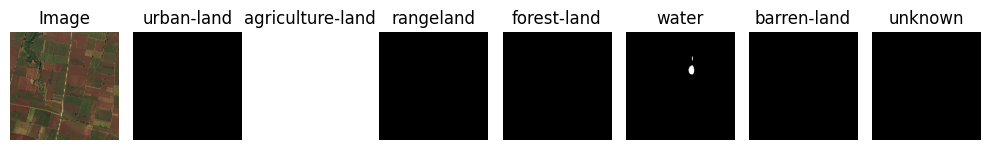

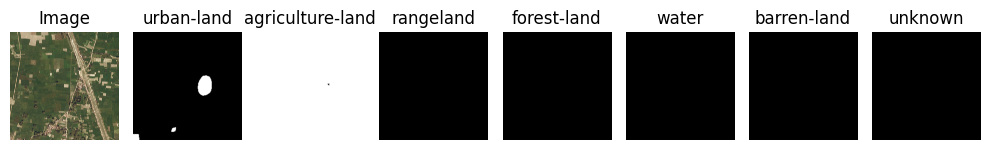

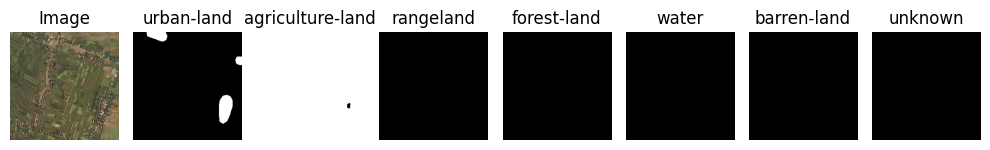

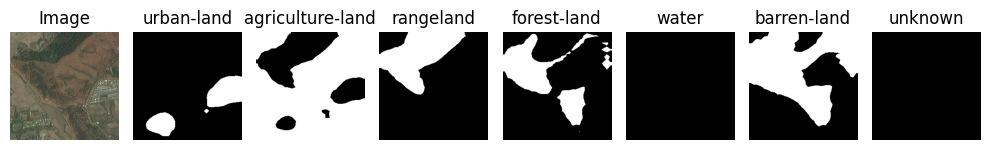

In [7]:
model_path = "/home/dragik/data/semseg/DeepGlobe/experiments/checkpoint.pth.tar"
labels =  ["urban-land", "agriculture-land", "rangeland", "forest-land", "water", "barren-land", "unknown"]
transform = ResizeToTensor()
model.load_model(model_path)

image = image_loader('/home/dragik/data/semseg/DeepGlobe/data/test_data/images/103665_sat.jpg')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/home/dragik/data/semseg/DeepGlobe/data/test_data/images/136252_sat.jpg')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/home/dragik/data/semseg/DeepGlobe/data/test_data/images/166293_sat.jpg')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/home/dragik/data/semseg/DeepGlobe/data/test_data/images/204494_sat.jpg')
fig = model.predict_masks(image, labels, transform)